<a href="https://colab.research.google.com/github/varsha595/QUANTUM-COMPUTING-PROJECT/blob/main/2qubit_grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U qiskit qiskit-aer pylatexenc matplotlib --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00


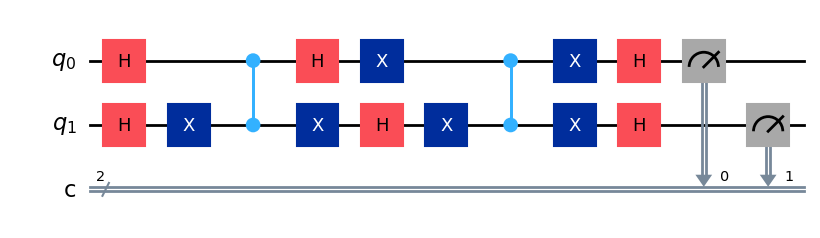

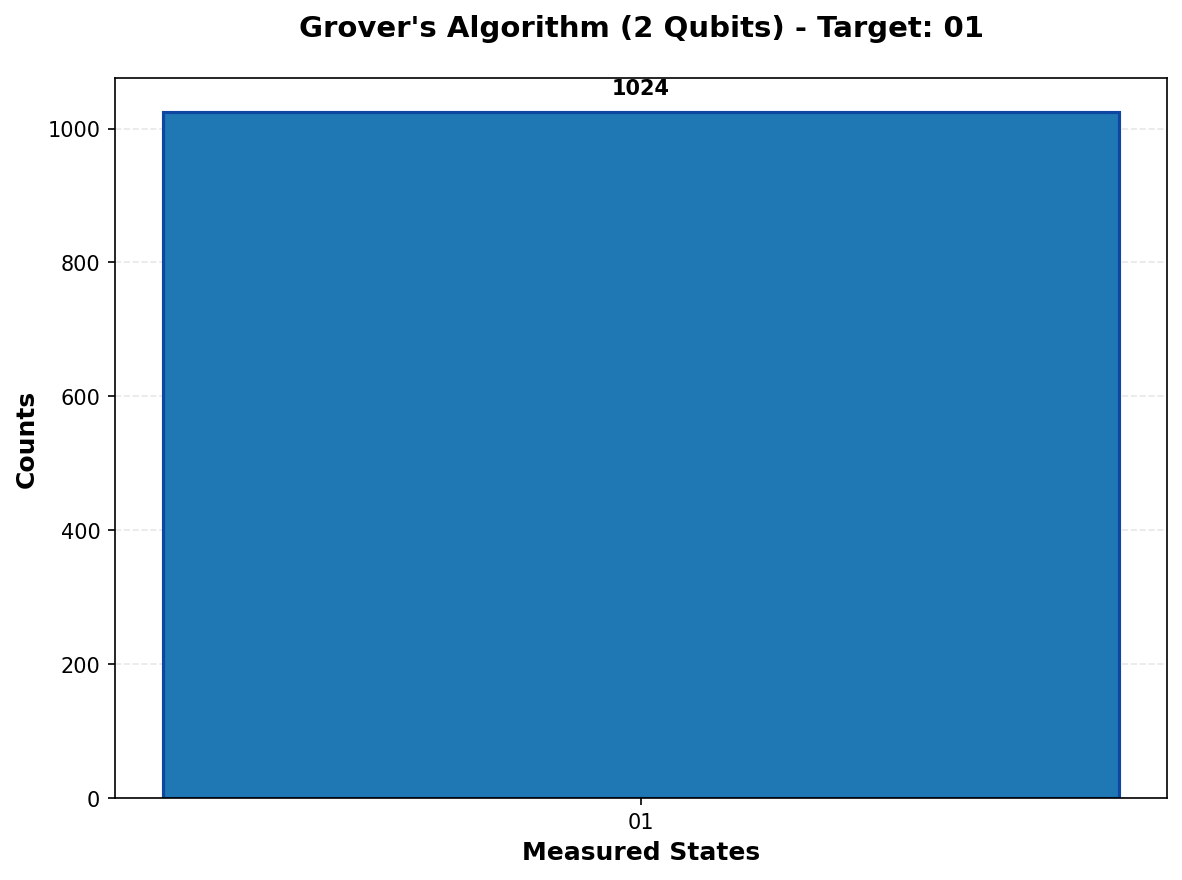


TARGET: 01
01: 1024 (100.00%) ← TARGET



In [ ]:


from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import Image, display

#  Define Grover 2-qubit circuit
def grover_2_qubit(target='01'):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])  # Superposition

    # Oracle
    if target == '00':
        qc.x([0,1]); qc.cz(0,1); qc.x([0,1])
    elif target == '01':
        qc.x(0); qc.cz(0,1); qc.x(0)
    elif target == '10':
        qc.x(1); qc.cz(0,1); qc.x(1)
    elif target == '11':
        qc.cz(0,1)

    # Diffusion
    qc.h([0,1]); qc.x([0,1]); qc.cz(0,1); qc.x([0,1]); qc.h([0,1])

    #  bit order
    qc = qc.reverse_bits()

    qc.measure([0,1],[0,1])
    return qc


#  Create the circuit
target_state = '01'
qc = grover_2_qubit(target_state)

#  Save & show circuit image explicitly
circuit_path = "/content/grover_circuit.png"
qc.draw('mpl').savefig(circuit_path, bbox_inches='tight')
display(Image(circuit_path))

#  Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

#  histogram
fig, ax = plt.subplots(figsize=(8, 6))
sorted_counts = dict(sorted(counts.items()))
states = list(sorted_counts.keys())
values = list(sorted_counts.values())

# VISUALIZATION
bars = ax.bar(states, values, color='#1f77b4', edgecolor='#0d47a1', linewidth=1.5)

ax.set_xlabel('Measured States', fontsize=12, fontweight='bold')
ax.set_ylabel('Counts', fontsize=12, fontweight='bold')
ax.set_title(f'Grover\'s Algorithm (2 Qubits) - Target: {target_state}',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add count labels on bars
for i, (state, count) in enumerate(zip(states, values)):
    if count > 0:  # Only show labels for non-zero counts
        ax.text(i, count + max(values)*0.02, str(count),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
hist_path = "/content/grover_histogram.png"
plt.savefig(hist_path, dpi=150, bbox_inches='tight')
display(Image(hist_path))
plt.close()

# output
print(f"\n{'='*40}")
print(f"TARGET: {target_state}")
print(f"{'='*40}")
for state, count in sorted_counts.items():
    marker = " ← TARGET" if state == target_state else ""
    print(f"{state}: {count:4d} ({count/1024*100:5.2f}%){marker}")
print(f"{'='*40}\n")